In [1]:
%load_ext sql

# Connect  to Superstore Database

In [2]:
%sql sqlite:///superstore.db

# 1) Sorting, Ascending vs Descending

Sorting queries helps to organize data in a specific order, allowing for easier analysis and interpretation. Additionally, sorting can aid in locating specific records or values within larger datasets.

This will be achieved with the `ORDER BY` clause, which will come **before** `LIMIT` and **after** `WHERE` when we write queries:



* SELECT	Specify what fields we want information from

* FROM	Specify what tables those fields are coming from

* WHERE	Specify any criteria that records in those fields should meet
* ORDER BY	Specify how to sort the results
* LIMIT	Specify how many records to return in results

For example, if we want to see the smallest *sales* for Superstore, we could write the following query:

In [8]:
%%sql

SELECT product_name, quantity, sales
  FROM orders
 ORDER BY sales
 limit 5;

 * sqlite:///superstore.db
Done.


product_name,quantity,sales
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum,1,0.444
Acco Suede Grain Vinyl Round Ring Binder,1,0.556
Avery Durable Slant Ring Binders With Label Holder,1,0.836
Avery Round Ring Poly Binders,1,0.852
Acco 3-Hole Punch,1,0.876


By default, SQL will sort records in **ascending order**, which means alphabetically (A-Z) for text and low to high for numbers.

To switch to **descending order**, or reverse alphabetically (Z-A) for text and high to low for numbers, we can include DESC, short for "descending," in our ORDER BY clause after the field name. In our example, this will help us see the most expensive sales:

In [9]:
%%sql
SELECT product_name, quantity, sales
  FROM orders
 ORDER BY sales DESC
 Limit 5;

 * sqlite:///superstore.db
Done.


product_name,quantity,sales
Cisco TelePresence System EX90 Videoconferencing Unit,6,22638.48
Canon imageCLASS 2200 Advanced Copier,5,17499.95
Canon imageCLASS 2200 Advanced Copier,4,13999.96
Canon imageCLASS 2200 Advanced Copier,4,11199.968
Canon imageCLASS 2200 Advanced Copier,3,10499.97


## Instructions

You've been asked to find the most profitable orders from the Superstore records.

1. Write a query that includes `order_id`, `product_name`, and `profit`.

1. Sort your results to show the records with the highest `profit`.

In [10]:
%%sql
SELECT order_id, product_name, profit
from orders
ORDER BY profit DESC
Limit 10;

 * sqlite:///superstore.db
Done.


order_id,product_name,profit
CA-2016-118689,Canon imageCLASS 2200 Advanced Copier,8399.976
CA-2017-140151,Canon imageCLASS 2200 Advanced Copier,6719.9808
CA-2017-166709,Canon imageCLASS 2200 Advanced Copier,5039.9856
CA-2016-117121,GBC Ibimaster 500 Manual ProClick Binding System,4946.37
CA-2014-116904,Ibico EPK-21 Electric Binding System,4630.4755
CA-2017-127180,Canon imageCLASS 2200 Advanced Copier,3919.9888
CA-2015-145352,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,3177.475
CA-2016-158841,"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",2799.984
US-2016-140158,Hewlett Packard LaserJet 3310 Copier,2591.9568
CA-2017-138289,GBC DocuBind P400 Electric Binding System,2504.2216


## 2) Ordering by Multiple Fields

Sorting by multiple fields is often helpful for interpretation of the data. For example, you have been asked to pull order quantity data by customer. In this case it's a matter of listing the desired fields in the order you'd like to sort them:

In [11]:
%%sql
SELECT customer_name, quantity
  FROM orders
 ORDER BY customer_name, quantity
 limit 10;

 * sqlite:///superstore.db
Done.


customer_name,quantity
Aaron Bergman,1
Aaron Bergman,2
Aaron Bergman,2
Aaron Bergman,2
Aaron Bergman,3
Aaron Bergman,3
Aaron Hawkins,2
Aaron Hawkins,2
Aaron Hawkins,3
Aaron Hawkins,3


We can see in this sample output that the first two customers alphabetically are "Aaron Bergman" and "Aaron Hawkins." They have both ordered from Superstore multiple times in various quantities.

Now what if you wanted to view this data by name alphabetically but quantity in descending order? Use the `DESC` operator next to any field to sort it Z-A or largest to smallest:

## Instructions

Your boss is curious about how discounts affect profit.

1. Write a query that includes the fields product_name, sales, discount, and profit.

1. Sort your results by largest to smallest discount percentage, then by lowest to highest profit.

In [12]:
%%sql
SELECT product_name, sales, discount, profit
from orders
ORDER BY discount DESC, profit ASC
Limit 10;

 * sqlite:///superstore.db
Done.


product_name,sales,discount,profit
GBC DocuBind P400 Electric Binding System,2177.584,0.8,-3701.8928
Ibico EPK-21 Electric Binding System,1889.99,0.8,-2929.4845
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,1525.188,0.8,-2287.782
GBC DocuBind P400 Electric Binding System,1088.792,0.8,-1850.9464
GBC DocuBind TL300 Electric Binding System,896.99,0.8,-1480.0335
Hoover Upright Vacuum With Dirt Cup,463.248,0.8,-1181.2824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,762.594,0.8,-1143.891
GBC Ibimaster 500 Manual ProClick Binding System,760.98,0.8,-1141.47
3.6 Cubic Foot Counter Height Office Refrigerator,294.62,0.8,-766.012
GBC ProClick 150 Presentation Binding System,442.372,0.8,-729.9138


# 4) ORDER BY with WHERE

As an analyst you'll often need to employ multiple SQL clauses to answer a question.

For example, you would like to extract product sales records sorted in descending order, but only for the **East** region. This can be done by combining `WHERE` with `ORDER BY`.

In [13]:
%%sql
SELECT order_id, product_id, sales
  FROM orders
 WHERE region = 'East'
 ORDER BY sales DESC
 Limit 5;

 * sqlite:///superstore.db
Done.


order_id,product_id,sales
CA-2017-127180,TEC-CO-10004722,11199.968
CA-2017-166709,TEC-CO-10004722,10499.97
US-2016-107440,TEC-MA-10001047,9099.93
CA-2016-143714,TEC-CO-10004722,8399.976
CA-2014-145541,TEC-MA-10001127,6999.96


## Instructions

1. Write a query to find records for `subcategory`, `sales`, and `profit`, only for the *Furniture* category.

1. Sort the results by sales (highest to lowest), then profit (lowest to highest).

In [15]:
%%sql
SELECT subcategory, sales, profit
FROM orders
WHERE category = 'Furniture'
ORDER BY sales DESC, profit ASC
Limit 10;

 * sqlite:///superstore.db
Done.


subcategory,sales,profit
Chairs,4416.174,-630.882
Bookcases,4404.9,1013.127
Tables,4297.644,-1862.3124
Bookcases,4228.704,158.5764
Bookcases,4007.84,-50.0980000000003
Chairs,3785.292,420.588
Tables,3610.848,135.4068
Chairs,3504.9,700.98
Bookcases,3406.664,160.3136
Tables,3393.68,610.8624


## 5) ORDER BY vs LIMIT

In [16]:
%%sql
SELECT order_id, quantity
from orders
WHERE region ='Central'
and category = 'Office Supplies'
ORDER by quantity DESC
LIMIT 10

 * sqlite:///superstore.db
Done.


order_id,quantity
CA-2015-146563,14
CA-2017-151750,14
CA-2014-154165,14
CA-2017-114524,13
CA-2016-117121,13
US-2014-151015,13
US-2016-110156,12
US-2014-160444,11
CA-2015-135622,11
CA-2014-142314,11


# 6) Revisiting the Order of Execution

Now that we have learned a new clause, let's see where it falls in SQL's order of execution:

1. FROM: The first thing SQL does when it runs a query is determine what data it will be looking at. Thus, it executes FROM first.

1. WHERE: After executing FROM SQL filters the results using WHERE

1. SELECT: Next in the order of execution is SELECT. So, after determining the table we're getting data from and filtering the records, SQL will choose the selected columns.

1. **ORDER BY**: Sorts the remaining data by specified field(s).

1. LIMIT: Finally, SQL limits the results with LIMIT (if this clause is used in the query).

Unlike the `WHERE` clause, **we are able to use aliases** in `ORDER BY` because it comes after they have been defined in the `SELECT` clause (Note, however, that there are a few SQL flavors where this is not the case.)

## Instructions

You have been asked to find the top ten products with a price per unit under $95.

1. Write a query that includes `product_name` and a calculated field aliased as `price_per_unit`.

1. Filter your results to only look at prices per unit under $95.

1. Sort your results to see the top 10 prices per unit under $95.

Remember to consider the order of execution when referencing aliased fields in other clauses.

In [17]:
%%sql
SELECT product_name,
sales/quantity as price_per_unit
FROM orders
WHERE sales/quantity < 95
ORDER BY price_per_unit DESC
LIMIT 10

 * sqlite:///superstore.db
Done.


product_name,price_per_unit
Kensington Expert Mouse Optical USB Trackball for PC or Mac,94.99000000000001
Kensington Expert Mouse Optical USB Trackball for PC or Mac,94.99
Kensington Expert Mouse Optical USB Trackball for PC or Mac,94.99
GBC ProClick 150 Presentation Binding System,94.794
"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",94.185
Jabra SPEAK 410,93.99000000000001
Jabra SPEAK 410,93.99000000000001
Jabra SPEAK 410,93.99
Jabra SPEAK 410,93.99
Jabra SPEAK 410,93.99


 7) Coding with Style

Unlike other coding languages like Python, SQL formatting is very flexible. SQL doesn't produce an error if we don't capitalize a keyword or if we include more than one clause on the same line. So why do we format at all? It all comes down to readability.

Let's take a look comparing an unformatted and formatted version of the same query.

**Unformatted**
```sql
select order_id, product_name, sales/quantity price_per_unit from orders
where order_id like 'CA%' order by quantity limit 10;
```

**Formatted**

```sql
SELECT order_id, product_name, sales/quantity AS price_per_unit   
  FROM orders
 WHERE order_id LIKE 'CA%'
 ORDER BY quantity
 LIMIT 10;
```

let's list some of the formatting guidelines we've been using in this course:

1. Each clause is placed on its own line and is capitalized.

1. All identifiers (i.e. column names) are lowercase.

1. All operators (i.e. `LIKE`) are uppercase.

1. Statements end with a semicolon(;). The semicolon is the traditional SQL escape character to identify the end of a statement.

Another thing that you might've picked up on is that, so far, we've indented clause-reserved words to be right-aligned, creating an empty "column" in the middle of the code. This is called a **river**.

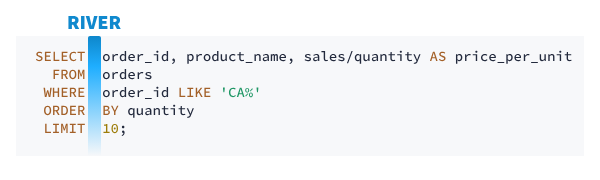